In [1]:
%load_ext autoreload
%autoreload 2
import os
from cnbpy.datalad import Dataset,Subject,Abide_Subject,Abide_Dataset
from cnbpy.bids import BIDS
from cnbpy.fmriprep import FMRIPREP
import cortex

local_path='/storage/research/cinn_comp/cnbpy_Resources/FMRIPREP_EXAMP'
source='///abide2/RawData/GU_1'

Dset=Abide_Dataset(local_path,source)

msub=Abide_Subject(Dset,'29040')

It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.


In [ ]:
msub.make_fmriprep_dataset()
msub.crawl_fmriprep_dataset()
msub.get_functional_data()
msub.make_bids()
msub.get_sess_run_combs()

In [2]:
msub.show_report(msub.fmriprep_report)

<IPython.core.display.Javascript object>

In [56]:
from cnbpy.preproc import Preprocessor
myprepoc=Preprocessor(msub)
myprepoc.make_pybest_script()
myprepoc.pybest_job.execute()

In [65]:
from cnbpy.analysis import CF_analysis
myan=CF_analysis(msub)
myan.startup(*msub.sess_run_combs[0],roilab='V1')
myan.prepare_analysis()

Generating subsurfaces
Creating distance by distance matrices


/home/users/yg916972/.conda/envs/p3env/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/home/users/yg916972/.conda/envs/p3env/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


In [16]:
myan.vars2

In [66]:
myan.fit_all_folds()

  0%|          | 0/5 [00:00<?, ?it/s]/home/users/yg916972/.conda/envs/p3env/lib/python3.6/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/home/users/yg916972/Software/cnbpy/cnbpy/analysis.py:185: RuntimeWarning: invalid value encountered in less
  xval4weights[xval4weights<0]=0.00001
100%|██████████| 5/5 [00:07<00:00,  1.45s/it]


In [67]:
myan.summarise_fits()

In [ ]:
myan.av_frame

In [49]:
myan.prepare_out_dirs()

AttributeError: 'CF_analysis' object has no attribute 'analysis_name'

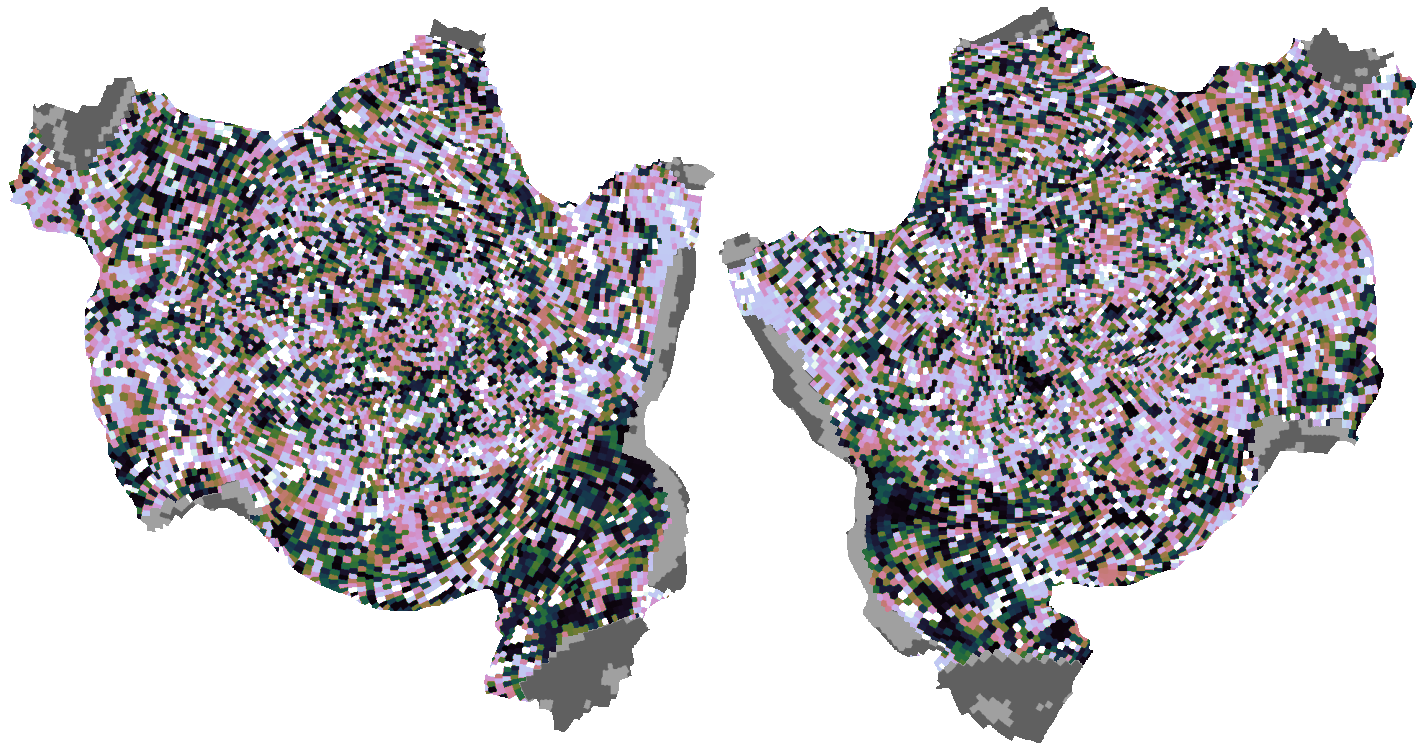

In [76]:
from cnbpy.pycortex_vis import basic_plot
a=basic_plot(myan.av_frame['rho'],vmax=10,subject='fsaverage5',cmap='cubehelix')

In [24]:
from cnbpy.utils import cart2pol

In [75]:
myan.av_frame['rho'],myan.av_frame['phi']=cart2pol(myan.av_frame['x'],myan.av_frame['y'])

In [35]:
import numpy as np
np.nanmin(myan.av_frame['phi'])

-3.1407026721193527

In [47]:
myan.prepare_out_dirs

'{subject}_{session}_{run}_{ROI}.csv'

In [ ]:
Outpath 